# Práctica 1.2: Análisis Inicial Imagen Digital
Vision Artificial

Equipo:
* Miguel Angel Sanchez Zanjuampa
* Navil Pineda Rugerio

In [2]:
# Librerias
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt

Abrimos la imagen a color utilizando opencv y la mostramos
NOTA: La imagen no se muestra con los colores originales debido a la funcion imshow

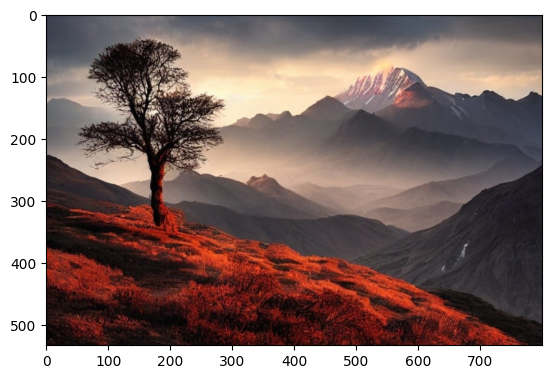

In [8]:
# Abrir imagen
ruta = '../../IMAGES/ldscp.jpg'
img = cv2.cvtColor(cv2.imread(ruta, 1), cv2.COLOR_BGR2RGB)
plt.imshow(img)


Se crea una funcion para generar un histgrama de cualquier imagen, en cualquiera de sus 3 canales de color.
Recibe como parametros la imagen, y el canal de color que se quiere analizar.
La funcion cuenta el número de pixeles que tienen valores entre 0 y 255, y devuelve la cantidad de pixeles en un arreglo.

In [7]:
# Funcion para histograma de imagen
def histograma(imagen, canal):
    hght, wid, channel = imagen.shape
    count =[]
    r = []
     
    for k in range(0, 255):
        r.append(k)
        count1 = 0
         
        for i in range(hght):
            for j in range(wid):
                if imagen[i, j, canal] == k:
                    count1+= 1
        count.append(count1)
         
    return (r, count)


Se hace el histograma del canal rojo

In [6]:
r, count_r = histograma(np.copy(img), 0) # Canal rojo

Se hace el histograma del canal verde

In [7]:
g, count_g = histograma(np.copy(img), 1) # Canal verde

Se hace el histograma del canal azul

In [14]:
b, count_b = histograma(np.copy(img), 2) # Canal azul

Se grafican los tres histogramas, el del canal rojo, el del canal verde y el del canal azul.
Como se puede observar el color que más predomina es el rojo

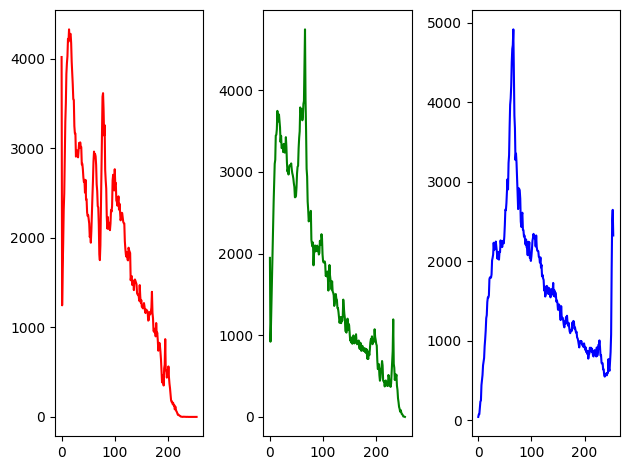

In [20]:
fig, ax = plt.subplots(1, 3)
ax[0].plot(r,count_r,color="red")
ax[1].plot(g,count_g,color="green")
ax[2].plot(b,count_b,color="blue")
fig.tight_layout()
plt.show()

La subventana de la imagen la creamos obteniendo solo una cuarta parte, para ello creamos una nueva imagen con los pixeles de la primera cuarta parte de la imagen original

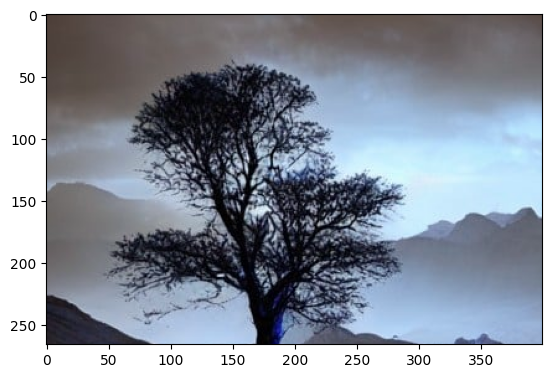

In [39]:
# Funcion para tomar un fragmento de la imagen
widImg, hghtImg, channel = img.shape
nuevaImagen = img[0:int(widImg/2), 0:int(hghtImg/2)]
plt.imshow(nuevaImagen)


Se crea la funcion para obtener la escala de grises precisa de la imagen o del fragmento de imagen que estamos utilizando.

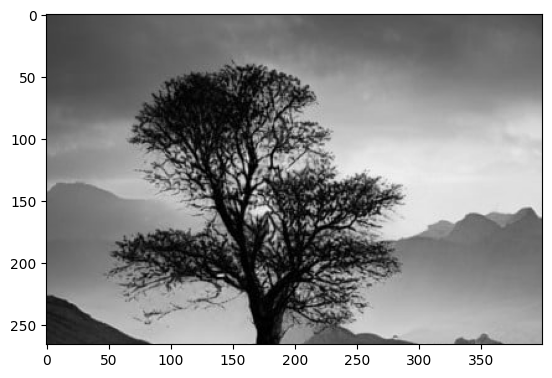

In [16]:
# Funcion para convertir a escala de grises la mini-imagen
def escala_grises(imagen):
    wid, hght, canal = imagen.shape
    matriz = np.copy(imagen)
    for i in range(hght):
        for j in range(wid):
            pixel = imagen[j][i]
            gris = (pixel[0] * 0.299) + (pixel[1] * 0.587) + (pixel[2] * 0.114)
            matriz[j][i][0] = gris
            matriz[j][i][1] = gris
            matriz[j][i][2] = gris
    return matriz

grisesImg = escala_grises(nuevaImagen)
plt.imshow(grisesImg)

Se calcula el histograma de esta mini-imagen en su escala de grises, con la funcion que previamente se programó para os historgramas por canal de color

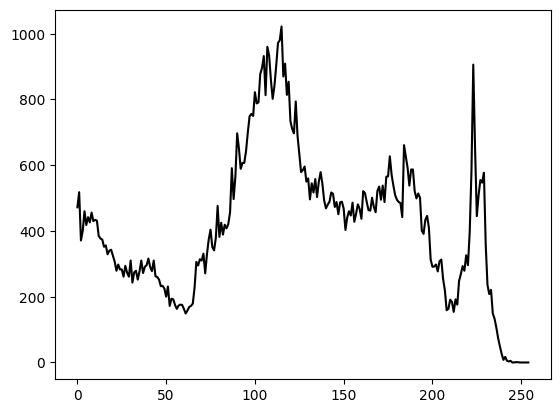

In [38]:
# Mostrar histograma de la mini-imagen en escala de grises
gr, count_gr = histograma(grisesImg, 0)
plt.plot(gr,count_gr,color="black")
plt.show()

Se eligen 5 filas al azar y se cacula su histograma, con esto podemos ver las transiciones de intensidad entre cada fila.

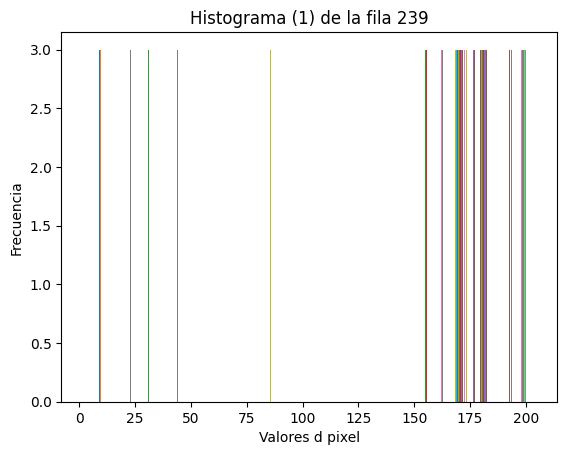

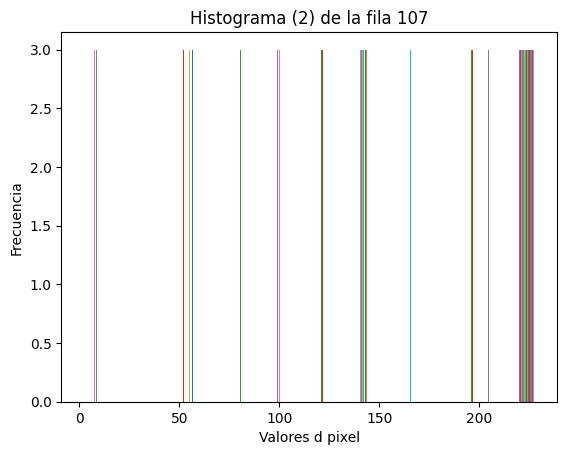

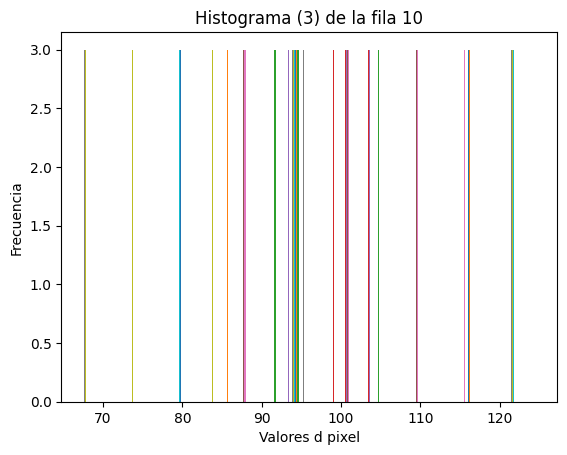

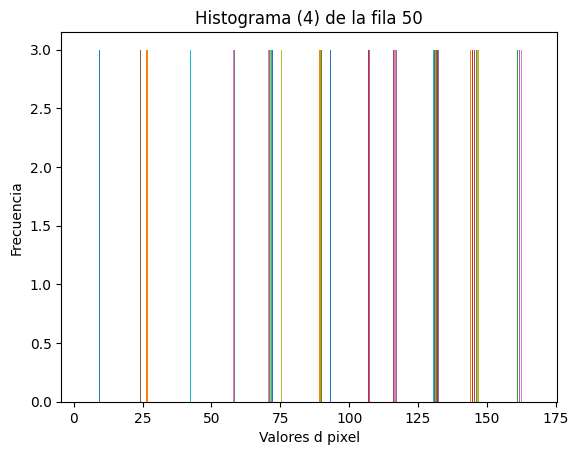

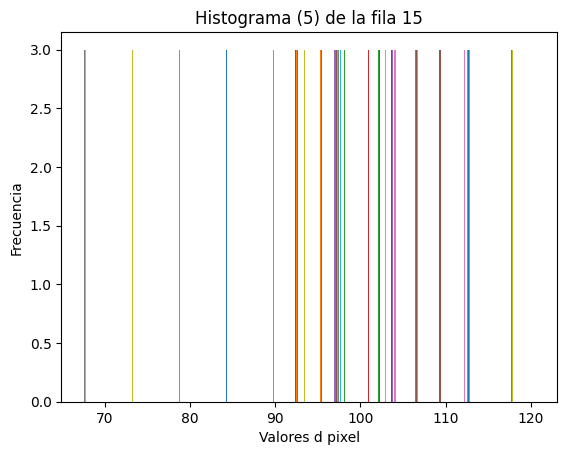

In [42]:
# Graficar valores de intensidad de 5 filas

#Dimensiones de la imagen
alto1, ancho1, canal = grisesImg.shape

for i in range(5):
    
    #Arreglo vacio para guardar valores de los pixeles
    datos = []
    
    #generar numero aleatorio entre 0 y el numero maximo de lo alto de nuestra imagen
    aleatorio = random.randint(0, alto1)
    
    #pasar por todo lo ancho de la imagen
    for j in range(ancho1):

        #guardar los valores en el arreglo
        datos.append( grisesImg[aleatorio,j] )
    
    #Calcular histograma
    plt.hist(x=datos)
    plt.title('Histograma (' + str(i+1) + ') de la fila ' + str(aleatorio))
    plt.xlabel('Valores d pixel')
    plt.ylabel('Frecuencia')

    #Mostrar histograma
    plt.show()
    